In [1]:
import torch
import matplotlib.pyplot as plt

import src.models as models
from src.audio_dataset import get_dataloader
from src.trainer import Trainer

import pandas as pd
import numpy as np
import pickle

from sklearn.metrics import f1_score, hamming_loss

In [2]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Trained on raw signal
wavecnn5 = getattr(models, 'WaveCNN5')
wavecnn5 = wavecnn5().to(device)

wavecnn7 = getattr(models, 'WaveCNN7')
wavecnn7 = wavecnn7().to(device)

wavecnn9 = getattr(models, 'WaveCNN9')
wavecnn9 = wavecnn9().to(device)

# Trained on mel specs
melcnn3 = getattr(models, 'FCN3')
melcnn3 = melcnn3().to(device)

melcnn4 = getattr(models, 'FCN4')
melcnn4 = melcnn4().to(device)

melcnn5 = getattr(models, 'FCN5')
melcnn5 = melcnn5().to(device)

melcnn7 = getattr(models, 'FCN7')
melcnn7 = melcnn7().to(device)


In [3]:
# Initialize the Trainer
# Trained on raw signal
trainer5 = Trainer(wavecnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer5.load_model('../models/WaveCNN5_final_no_L2_20231129-0723.pth')

trainer5_l2 = Trainer(wavecnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer5_l2.load_model('../models/WaveCNN5_final_20231202-0017.pth')

trainer7 = Trainer(wavecnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer7.load_model('../models/WaveCNN7_final_no_L2_20231129-0825.pth')

trainer7_l2 = Trainer(wavecnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer7_l2.load_model('../models/WaveCNN7_final_20231202-0259.pth')

trainer9 = Trainer(wavecnn9, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer9.load_model('../models/WaveCNN9_final_no_L2_20231130-2232.pth')

trainer9_l2 = Trainer(wavecnn9, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer9_l2.load_model('../models/WaveCNN9_final_20231202-0251.pth')

# Trained on mel specs
trainer_mel3 = Trainer(melcnn3, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel3.load_model('../models/FCN3_final_no_l2_20231130-2114.pth')

trainer_mel3_l2 = Trainer(melcnn3, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel3_l2.load_model('../models/FCN3_final_l2_20231201-2129.pth')

trainer_mel4 = Trainer(melcnn4, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel4.load_model('../models/FCN4_final_no_l2_20231201-2219.pth')

trainer_mel4_l2 = Trainer(melcnn4, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel4_l2.load_model('../models/FCN4_final_l2_20231201-2126.pth')

trainer_mel5 = Trainer(melcnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel5.load_model('../models/FCN5_final_no_L2_20231130-1948.pth')

trainer_mel5_l2 = Trainer(melcnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel5_l2.load_model('../models/FCN5_final_l2_20231201-2127.pth')

trainer_mel7_l2 = Trainer(melcnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel7_l2.load_model('../models/FCN7_final_l2_20231201-2215.pth')

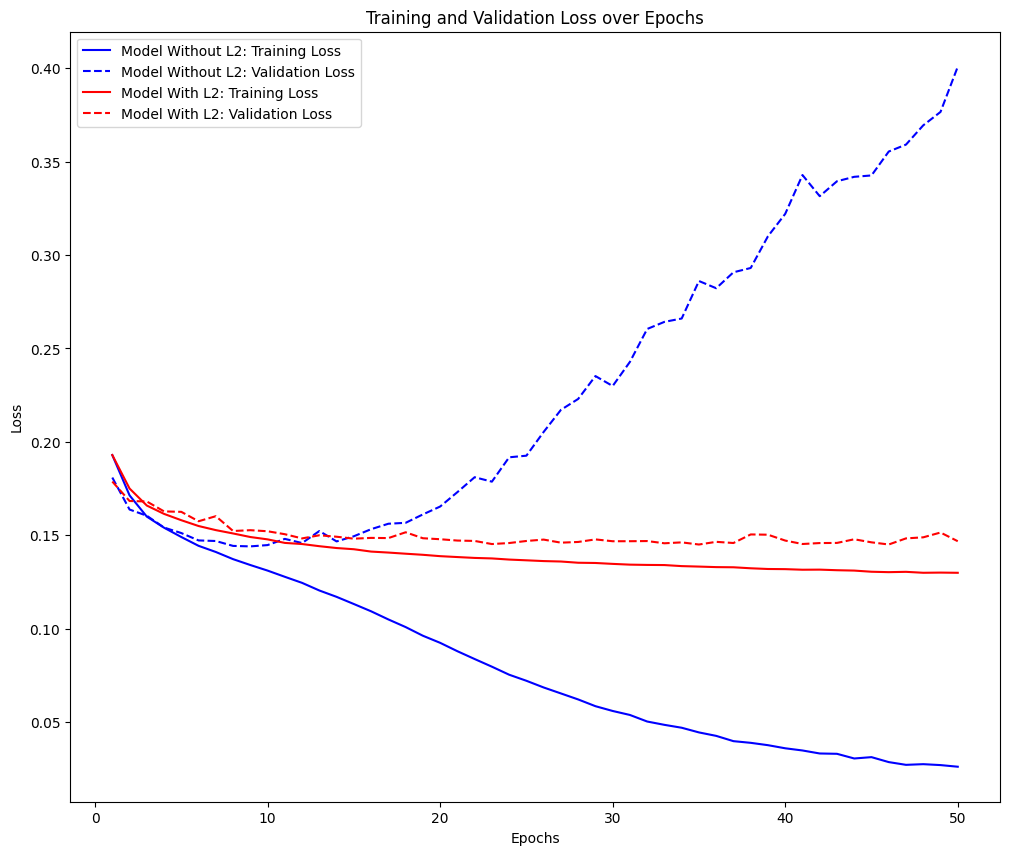

In [4]:
# Models
m = trainer7
n = trainer7_l2

# Epoch range
epochs = range(1, 51) 

plt.figure(figsize=(12, 10))

# Plot for first model
plt.plot(epochs, m.history['train_loss'], 'b-', label='Model Without L2: Training Loss')
plt.plot(epochs, m.history['val_loss'], 'b--', label='Model Without L2: Validation Loss')

# Plot for second model
plt.plot(epochs, n.history['train_loss'], 'r-', label='Model With L2: Training Loss')
plt.plot(epochs, n.history['val_loss'], 'r--', label='Model With L2: Validation Loss')

plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


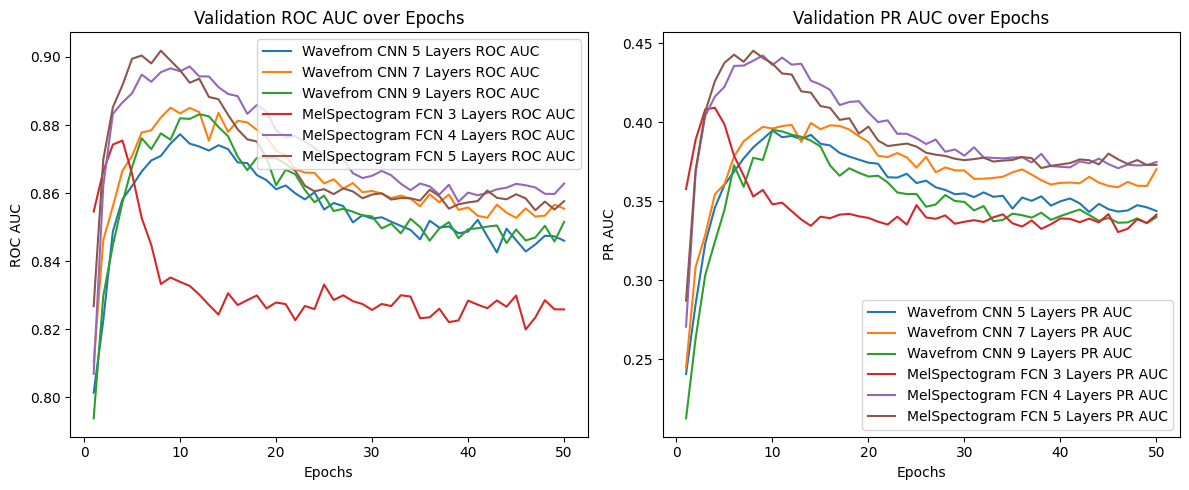

In [5]:
# Sample data
# Replace these with your actual data
epochs = range(1, 51)  # Example epoch range from 1 to 10

# Plotting
plt.figure(figsize=(12, 5))

# Plot for val_roc_auc
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs, trainer5.history['val_roc_auc'], label='Wavefrom CNN 5 Layers ROC AUC')
plt.plot(epochs, trainer7.history['val_roc_auc'], label='Wavefrom CNN 7 Layers ROC AUC')
plt.plot(epochs, trainer9.history['val_roc_auc'], label='Wavefrom CNN 9 Layers ROC AUC')
plt.plot(epochs, trainer_mel3.history['val_roc_auc'], label='MelSpectogram FCN 3 Layers ROC AUC')
plt.plot(epochs, trainer_mel4.history['val_roc_auc'], label='MelSpectogram FCN 4 Layers ROC AUC')
plt.plot(epochs, trainer_mel5.history['val_roc_auc'], label='MelSpectogram FCN 5 Layers ROC AUC')
plt.title('Validation ROC AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

# Plot for val_pr_auc
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs, trainer5.history['val_pr_auc'], label='Wavefrom CNN 5 Layers PR AUC')
plt.plot(epochs, trainer7.history['val_pr_auc'], label='Wavefrom CNN 7 Layers PR AUC')
plt.plot(epochs, trainer9.history['val_pr_auc'], label='Wavefrom CNN 9 Layers PR AUC')
plt.plot(epochs, trainer_mel3.history['val_pr_auc'], label='MelSpectogram FCN 3 Layers PR AUC')
plt.plot(epochs, trainer_mel4.history['val_pr_auc'], label='MelSpectogram FCN 4 Layers PR AUC')
plt.plot(epochs, trainer_mel5.history['val_pr_auc'], label='MelSpectogram FCN 5 Layers PR AUC')
plt.title('Validation PR AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('PR AUC')
plt.legend()

plt.tight_layout()
plt.show()

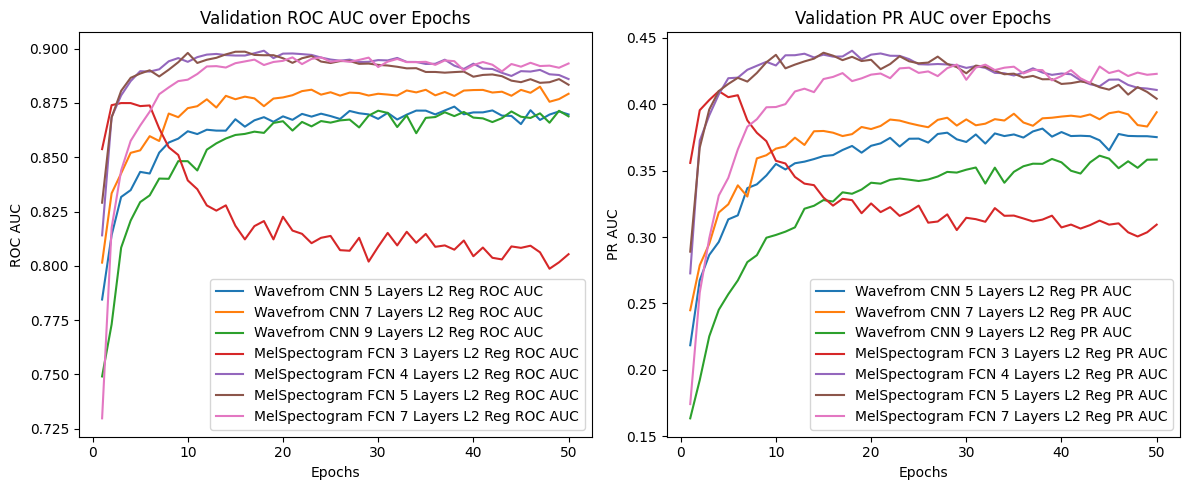

In [6]:
# Same for with L2
# Replace these with your actual data
epochs = range(1, 51)  # Example epoch range from 1 to 10

# Plotting
plt.figure(figsize=(12, 5))

# Plot for val_roc_auc
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs, trainer5_l2.history['val_roc_auc'], label='Wavefrom CNN 5 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer7_l2.history['val_roc_auc'], label='Wavefrom CNN 7 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer9_l2.history['val_roc_auc'], label='Wavefrom CNN 9 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer_mel3_l2.history['val_roc_auc'], label='MelSpectogram FCN 3 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer_mel4_l2.history['val_roc_auc'], label='MelSpectogram FCN 4 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer_mel5_l2.history['val_roc_auc'], label='MelSpectogram FCN 5 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer_mel7_l2.history['val_roc_auc'], label='MelSpectogram FCN 7 Layers L2 Reg ROC AUC')
plt.title('Validation ROC AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

# Plot for val_pr_auc
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs, trainer5_l2.history['val_pr_auc'], label='Wavefrom CNN 5 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer7_l2.history['val_pr_auc'], label='Wavefrom CNN 7 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer9_l2.history['val_pr_auc'], label='Wavefrom CNN 9 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer_mel3_l2.history['val_pr_auc'], label='MelSpectogram FCN 3 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer_mel4_l2.history['val_pr_auc'], label='MelSpectogram FCN 4 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer_mel5_l2.history['val_pr_auc'], label='MelSpectogram FCN 5 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer_mel7_l2.history['val_pr_auc'], label='MelSpectogram FCN 7 Layers L2 Reg PR AUC')
plt.title('Validation PR AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('PR AUC')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
test_annotations = 'mtat_test_label.csv'
data_dir = '../data'
    
# Ealuate the model on the test set
test_loader = get_dataloader(
    annotations_file=test_annotations,
    data_dir=data_dir,
    batch_size=32,
    shuffle=False,
    num_workers=0,
    sample_rate=16000,
    target_length=29.1,
)


In [8]:
# Instantiate models and load BEST model (THIS TIME BEST MODEL INSTEAD OF FINAL MODEL)
# load only best model (see filenames) to ensure we evaluate with best epoch
# only use regularized models
# raw
trainer5_l2 = Trainer(wavecnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer5_l2.load_model('../models/WaveCNN5_best_20231202-0017.pth')

trainer7_l2 = Trainer(wavecnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer7_l2.load_model('../models/WaveCNN7_best_20231202-0259.pth')

trainer9_l2 = Trainer(wavecnn9, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer9_l2.load_model('../models/WaveCNN9_best_20231202-0251.pth')

# spec
trainer_mel3_l2 = Trainer(melcnn3, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel3_l2.load_model('../models/FCN3_best_l2_20231201-2129.pth')

trainer_mel4_l2 = Trainer(melcnn4, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel4_l2.load_model('../models/FCN4_best_l2_20231201-2126.pth')

trainer_mel5_l2 = Trainer(melcnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel5_l2.load_model('../models/FCN5_best_l2_20231201-2127.pth')

trainer_mel7_l2 = Trainer(melcnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel7_l2.load_model('../models/FCN7_best_l2_20231201-2215.pth')


**Load evaluation metrics (will take long, maybe split into different cells)**
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer5_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer7_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer9_l2.evaluate(test_loader)

avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer_mel3_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer_mel4_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer_mel5_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer_mel7_l2.evaluate(test_loader)

## Run evaluation on test set

In [9]:
# Dictionary to store evaluation results
evaluation_results = {}

evaluation_results['trainer5_l2'] = trainer5_l2.evaluate(test_loader)

evaluation_results['trainer7_l2'] = trainer7_l2.evaluate(test_loader)

evaluation_results['trainer9_l2'] = trainer9_l2.evaluate(test_loader)

evaluation_results['trainer_mel3_l2'] = trainer_mel3_l2.evaluate(test_loader)

evaluation_results['trainer_mel4_l2'] = trainer_mel4_l2.evaluate(test_loader)

evaluation_results['trainer_mel5_l2'] = trainer_mel5_l2.evaluate(test_loader)

evaluation_results['trainer_mel7_l2'] = trainer_mel7_l2.evaluate(test_loader)

### Store test results
Load the results as a dictionary into `evaluation_results` as it would be after running the models on the test set.

with open('pickles/evaluation_results.pkl', 'wb') as file:
    pickle.dump(evaluation_results, file)

### Load test results

In [10]:
# Load the pickle file
with open('pickles/evaluation_results.pkl', 'rb') as file:
    evaluation_results = pickle.load(file)
    

# Edge case analysis

## 1 Find the best model

###  1.1 ROC AUC, PR AUC, Loss

In [11]:
# evaluation_results is the dictionary containing model metrics
models = ['trainer5_l2', 'trainer7_l2', 'trainer9_l2', 'trainer_mel3_l2', 'trainer_mel4_l2', 'trainer_mel5_l2', 'trainer_mel7_l2']

# Extracting metrics
roc_aucs = [evaluation_results[model][1] for model in models]
pr_aucs = [evaluation_results[model][2] for model in models]
average_losses = [evaluation_results[model][0] for model in models]

# Creating DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'ROC AUC': roc_aucs,
    'PR AUC': pr_aucs,
    'Average Loss': average_losses
})

# Displaying the DataFrame
print(comparison_df)


             Model   ROC AUC    PR AUC  Average Loss
0      trainer5_l2  0.872951  0.385488      0.150805
1      trainer7_l2  0.881393  0.394975      0.146195
2      trainer9_l2  0.872809  0.361611      0.148801
3  trainer_mel3_l2  0.806853  0.315297      0.353082
4  trainer_mel4_l2  0.883839  0.413385      0.152391
5  trainer_mel5_l2  0.881370  0.410427      0.155113
6  trainer_mel7_l2  0.895129  0.430891      0.137294


### 1.2 Visualisation

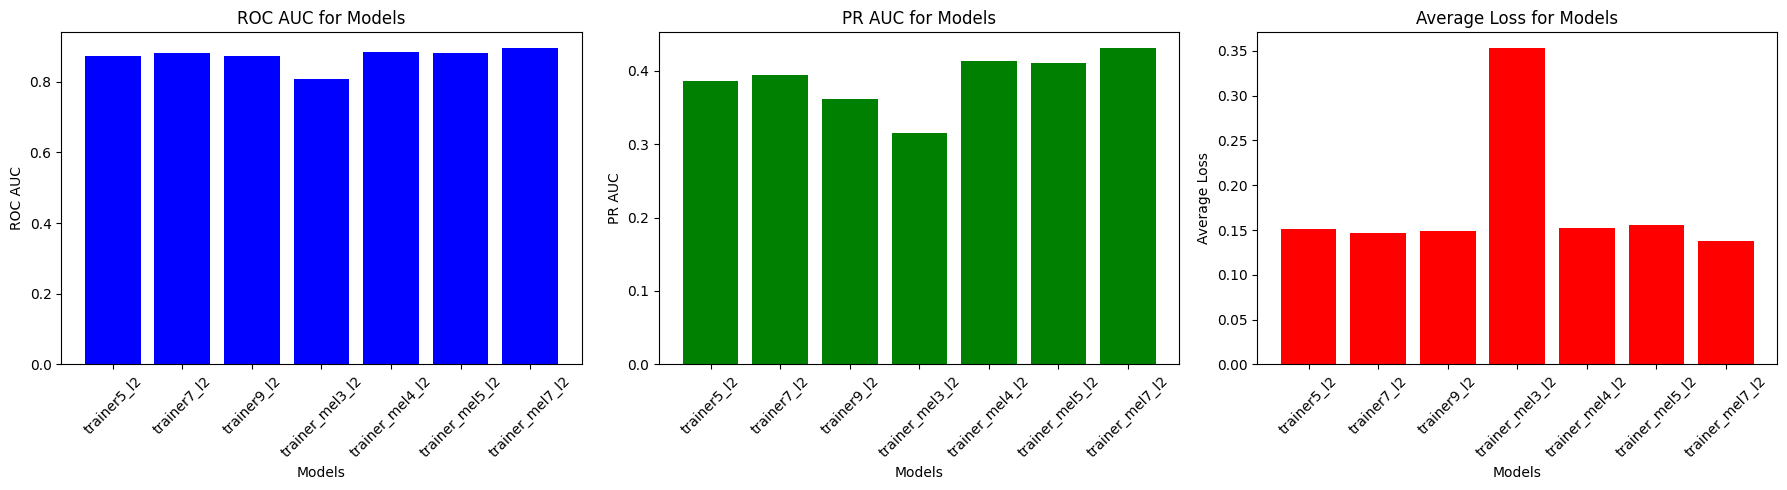

In [12]:
# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Adjusted to include 3 subplots

# Set the tick positions and labels for each subplot
for i in range(3):
    ax[i].set_xticks(range(len(models)))
    ax[i].set_xticklabels(models, rotation=45)

# ROC AUC Bar Chart
ax[0].bar(range(len(models)), roc_aucs, color='blue')
ax[0].set_title('ROC AUC for Models')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('ROC AUC')

# PR AUC Bar Chart
ax[1].bar(range(len(models)), pr_aucs, color='green')
ax[1].set_title('PR AUC for Models')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('PR AUC')

# Average Loss Bar Chart
ax[2].bar(range(len(models)), average_losses, color='red')
ax[2].set_title('Average Loss for Models')
ax[2].set_xlabel('Models')
ax[2].set_ylabel('Average Loss')

plt.tight_layout()
plt.show()


## 2 Inspect best model
Analyse the best performing model(s) results to find potential edge cases

### 2.1 Preprocessing of results
We have to convert the predicted labels from floating point probabilities to a binary array, so it can be compared to the true labels.

In [13]:
# Ensure predicted_probs is a list of NumPy arrays
predicted_probs = evaluation_results['trainer_mel7_l2'][3]

# Concatenate all predicted probabilities to form a single array
predicted_probs_concatenated = np.concatenate(predicted_probs)

# Ensure true_labels is also a list of NumPy arrays
true_labels = evaluation_results['trainer_mel7_l2'][4]

# Concatenate all true labels to form a single array
true_labels_concatenated = np.concatenate(true_labels)

# Apply threshold to convert probabilities to binary labels
threshold = 0.5
predicted_labels_binary = (predicted_probs_concatenated >= threshold).astype(int)

# Verify the shapes
assert true_labels_concatenated.shape == predicted_labels_binary.shape, "Shapes of arrays do not match"

print("Shape of true_labels_concatenated:", true_labels_concatenated.shape)
print("Shape of predicted_labels_binary:", predicted_labels_binary.shape)

Shape of true_labels_concatenated: (4328, 50)
Shape of predicted_labels_binary: (4328, 50)


### 2.2 Find misclassified samples

#### 2.2.1 Subset accuracy
This approach is rather strict, as a sample is only considered to be correctly classified if all predicted labels match the true labels.

In [14]:
# Identifying misclassified samples
misclassified_indices = []
for i in range(len(true_labels_concatenated)):
    if not np.array_equal(true_labels_concatenated[i], predicted_labels_binary[i]):
        misclassified_indices.append(i)

# Number of misclassified samples
num_misclassified = len(misclassified_indices)

# Total number of samples
total_samples = len(true_labels_concatenated)

# Calculate the percentage of misclassified samples
misclassified_percentage = (num_misclassified / total_samples) * 100

# Print the number and percentage of misclassified samples
print(f"Number of misclassified samples by subset accuracy : {num_misclassified} / {total_samples} ({misclassified_percentage:.2f}%)")


Number of misclassified samples by subset accuracy : 3946 / 4328 (91.17%)


#### 2.2.2 Jaccard Similarity
Used to identify samples where the model's prediction significantly diverges from the actual labels. Samples with a Jaccard Similarity below a certain threshold can be considered as edge cases.

In [22]:
# Define a threshold for low Jaccard Similarity
threshold = 0.01

def calculate_jaccard_similarity(true_labels, predicted_labels):
    intersection = np.logical_and(true_labels, predicted_labels).sum(axis=1)
    union = np.logical_or(true_labels, predicted_labels).sum(axis=1)
    similarity = np.divide(intersection, union, out=np.zeros_like(intersection, dtype=float), where=(union != 0))
    return similarity

jaccard_similarities = calculate_jaccard_similarity(true_labels_concatenated, predicted_labels_binary)

# Calculate and print the average Jaccard Similarity
average_jaccard_similarity = np.mean(jaccard_similarities)
print("Number of Jaccard Similarity Scores:", len(jaccard_similarities))
print("Average Jaccard Similarity:", average_jaccard_similarity)

# Identify samples with Jaccard Similarity below the threshold
low_jaccard_indices = [index for index, score in enumerate(jaccard_similarities) if score < threshold]

# Calculate and print the percentage of samples below the threshold
percentage_low_jaccard = (len(low_jaccard_indices) / len(jaccard_similarities)) * 100
print(f"Samples with Jaccard Similarity below {threshold}: {len(low_jaccard_indices)} ({percentage_low_jaccard:.2f}%)")

print("\nIndices:")
print(low_jaccard_indices)


Number of Jaccard Similarity Scores: 4328
Average Jaccard Similarity: 0.3646977957860582
Samples with Jaccard Similarity below 0.01: 990 (22.87%)

Indices:
[13, 19, 23, 30, 32, 35, 36, 49, 55, 57, 61, 62, 66, 71, 72, 73, 79, 88, 90, 106, 117, 129, 136, 140, 144, 146, 148, 149, 151, 158, 162, 165, 166, 167, 172, 177, 178, 179, 180, 183, 188, 191, 192, 193, 199, 201, 202, 204, 208, 209, 211, 214, 217, 218, 221, 225, 232, 239, 242, 246, 248, 260, 264, 270, 272, 273, 277, 282, 289, 290, 291, 293, 298, 299, 310, 312, 315, 319, 321, 323, 326, 327, 344, 348, 349, 355, 356, 362, 364, 371, 372, 373, 375, 387, 389, 400, 401, 404, 411, 412, 414, 415, 425, 434, 442, 452, 462, 463, 464, 468, 476, 483, 486, 488, 493, 496, 508, 522, 536, 542, 547, 552, 555, 562, 564, 565, 569, 570, 572, 583, 585, 589, 592, 594, 599, 600, 607, 612, 616, 621, 624, 627, 629, 633, 640, 648, 651, 652, 662, 670, 673, 676, 678, 679, 688, 689, 692, 693, 700, 703, 716, 718, 724, 728, 734, 735, 750, 752, 756, 761, 763, 767, 77

#### 2.3.2 Sample F1
To be less strict, we can conduct a smaple-wise evaluation using precision, recall, and F-score.

In [16]:
# Define a threshold for low F1-score
low_f1_threshold = 0.01

# Calculate sample-wise F1-score
sample_f1 = [f1_score(true, pred, average='binary', zero_division=0) 
             for true, pred in zip(true_labels_concatenated, predicted_labels_binary)]

# Calculate the average sample-wise F1-score
average_sample_f1 = np.mean(sample_f1)

# Count the number of samples below the threshold
num_samples_below_threshold = sum(score < low_f1_threshold for score in sample_f1)
percentage_below_threshold = (num_samples_below_threshold / len(sample_f1)) * 100

print(f"Number of Samples: {len(sample_f1)}")
print(f"Average Sample-wise F1-score: {average_sample_f1}")
print(f"Samples with F1-score below {low_f1_threshold}: {num_samples_below_threshold} ({percentage_below_threshold:.2f}%)")

print("\nIndices:")
low_f1_samples = [index for index, score in enumerate(sample_f1) if score < low_f1_threshold]
print(low_f1_samples)


Number of Samples: 4328
Average Sample-wise F1-score: 0.46865472597334895
Samples with F1-score below 0.01: 990 (22.87%)

Indices:
[13, 19, 23, 30, 32, 35, 36, 49, 55, 57, 61, 62, 66, 71, 72, 73, 79, 88, 90, 106, 117, 129, 136, 140, 144, 146, 148, 149, 151, 158, 162, 165, 166, 167, 172, 177, 178, 179, 180, 183, 188, 191, 192, 193, 199, 201, 202, 204, 208, 209, 211, 214, 217, 218, 221, 225, 232, 239, 242, 246, 248, 260, 264, 270, 272, 273, 277, 282, 289, 290, 291, 293, 298, 299, 310, 312, 315, 319, 321, 323, 326, 327, 344, 348, 349, 355, 356, 362, 364, 371, 372, 373, 375, 387, 389, 400, 401, 404, 411, 412, 414, 415, 425, 434, 442, 452, 462, 463, 464, 468, 476, 483, 486, 488, 493, 496, 508, 522, 536, 542, 547, 552, 555, 562, 564, 565, 569, 570, 572, 583, 585, 589, 592, 594, 599, 600, 607, 612, 616, 621, 624, 627, 629, 633, 640, 648, 651, 652, 662, 670, 673, 676, 678, 679, 688, 689, 692, 693, 700, 703, 716, 718, 724, 728, 734, 735, 750, 752, 756, 761, 763, 767, 771, 772, 775, 779, 783, 78

### 2.3 Find misclassified labels

#### 2.3.1 Hamming Loss
Used to understand which labels are most frequently misclassified across all samples. Labels with a high contribution to the Hamming Loss could be a sign for potential edge cases.

In [17]:
# Define a threshold for high Hamming Loss
threshold_hamming_loss = 0.09

# Calculate the number of labels
num_labels = true_labels_concatenated.shape[1]
print(f"Number of Labels: {num_labels}")

# Calculate the average Hamming Loss for the dataset
avg_hamming_loss = hamming_loss(true_labels_concatenated, predicted_labels_binary)
print(f"Average Hamming Loss: {avg_hamming_loss}")

# Identify labels with Hamming Loss exceeding the threshold
high_hamming_loss_labels = []
for label_index in range(num_labels):
    hamming_loss_label = hamming_loss(true_labels_concatenated[:, label_index], predicted_labels_binary[:, label_index])
    if hamming_loss_label > threshold_hamming_loss:
        high_hamming_loss_labels.append(label_index)

# Count the number and calculate the percentage of labels with high Hamming Loss
num_high_hamming_loss = len(high_hamming_loss_labels)
percentage_high_hamming_loss = (num_high_hamming_loss / num_labels) * 100
print(f"Labels with Hamming Loss above {threshold_hamming_loss}: {num_high_hamming_loss} ({percentage_high_hamming_loss:.2f}%)")

print("\nIndices:")
print(high_hamming_loss_labels)


Number of Labels: 50
Average Hamming Loss: 0.051922365988909425
Labels with Hamming Loss above 0.09: 10 (20.00%)

Indices:
[0, 1, 2, 4, 5, 6, 7, 8, 10, 12]


#### 2.3.2 Label F1
To be less strict, we can conduct a label-wise evaluation using precision, recall, and F-score.

In [18]:
# Define a threshold for low F1-score
low_f1_threshold = 0.01

# Calculate F1-score for each label
label_f1 = f1_score(true_labels_concatenated, predicted_labels_binary, average=None, zero_division=0)

# Calculate the average F1-score
average_f1 = np.mean(label_f1)
print(f"Number of Labels: {len(label_f1)}")
print(f"Average F1-score: {average_f1}")

# Identify labels with F1-score below the threshold
low_f1_labels = [label_index for label_index, score in enumerate(label_f1) if score < low_f1_threshold]

# Count the number and calculate the percentage of labels with low F1-score
num_low_f1 = len(low_f1_labels)
percentage_low_f1 = (num_low_f1 / len(label_f1)) * 100
print(f"Labels with F1-score below {low_f1_threshold}: {num_low_f1} ({percentage_low_f1:.2f}%)")

print("\nIndices:")
print(low_f1_labels)


Number of Labels: 50
Average F1-score: 0.31780789418753985
Labels with F1-score below 0.01: 12 (24.00%)

Indices:
[8, 28, 30, 32, 39, 40, 41, 44, 46, 47, 48, 49]


## 3 Inspect edge cases
Now that we have used several evaluation metrics to find samples and labels the model underperforms on, we have to inspect them in detail to find out about the potential reasons.

### 3.1 Samples


#### 3.1.2 Find samples to inspect
Find samples that have bad scores in both, jaccard score and F1.

In [24]:
# Convert the lists to sets for efficient intersection operation
low_jaccard_set = set(low_jaccard_indices)
low_f1_set = set(low_f1_samples)

# Find the intersection of the two sets to get indices present in both lists
common_indices = low_jaccard_set.intersection(low_f1_set)

# Count the number of common indices and calculate the percentage
num_common_indices = len(common_indices)
percentage_common = (num_common_indices / len(true_labels_concatenated)) * 100

# Format the output
print(f"Number of Samples: {len(true_labels_concatenated)}")
print(f"Samples with both low Jaccard Similarity and low F1-score: {num_common_indices} ({percentage_common:.2f}%)")
print("\nIndices:")
print(sorted(common_indices))


Number of Samples: 4328
Samples with both low Jaccard Similarity and low F1-score: 990 (22.87%)

Indices:
[13, 19, 23, 30, 32, 35, 36, 49, 55, 57, 61, 62, 66, 71, 72, 73, 79, 88, 90, 106, 117, 129, 136, 140, 144, 146, 148, 149, 151, 158, 162, 165, 166, 167, 172, 177, 178, 179, 180, 183, 188, 191, 192, 193, 199, 201, 202, 204, 208, 209, 211, 214, 217, 218, 221, 225, 232, 239, 242, 246, 248, 260, 264, 270, 272, 273, 277, 282, 289, 290, 291, 293, 298, 299, 310, 312, 315, 319, 321, 323, 326, 327, 344, 348, 349, 355, 356, 362, 364, 371, 372, 373, 375, 387, 389, 400, 401, 404, 411, 412, 414, 415, 425, 434, 442, 452, 462, 463, 464, 468, 476, 483, 486, 488, 493, 496, 508, 522, 536, 542, 547, 552, 555, 562, 564, 565, 569, 570, 572, 583, 585, 589, 592, 594, 599, 600, 607, 612, 616, 621, 624, 627, 629, 633, 640, 648, 651, 652, 662, 670, 673, 676, 678, 679, 688, 689, 692, 693, 700, 703, 716, 718, 724, 728, 734, 735, 750, 752, 756, 761, 763, 767, 771, 772, 775, 779, 783, 785, 787, 797, 805, 808, 81

In [ ]:
# next: finde the samples corresponding to these labels to analyse them